# Objective: Compare the photometry between PyMorph and SDSS

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

from astropy.io.ascii import read
import fitsio

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [14]:
def medxbin(x,y,binsize,minpts=20,xmin=None,xmax=None):
    """
    Compute the median (and other statistics) in fixed bins along the x-axis.
    """
    import numpy as np
    from scipy import ptp

    # Need an exception if there are fewer than three arguments.

    if xmin==None:
        xmin = x.min()
    if xmax==None:
        xmax = x.max()
    #print(xmin,xmax)

    nbin = int(ptp(x)/binsize)
    bins = np.linspace(xmin,xmax,nbin)
    idx  = np.digitize(x,bins)
    #print(nbin, bins, xmin, xmax)

    stats = np.zeros(nbin,[('median','f8'),('sigma','f8'),('iqr','f8')])
    for kk in np.arange(nbin):
        npts = len(y[idx==kk])
        if npts>minpts:
            stats['median'][kk] = np.median(y[idx==kk])
            stats['sigma'][kk] = np.std(y[idx==kk])
            stats['iqr'][kk] = np.subtract(*np.percentile(y[idx==kk],[75, 25]))

    # Remove bins with too few points.
    good = np.nonzero(stats['median'])
    stats = stats[good]

    return bins[good], stats

In [2]:
# Read in all necessary data
pypath = os.path.join(os.sep, 'global', 'work', 'projects', 'legacysurvey', 'legacycentrals')
meertcat = os.path.join(pypath, 'meert_et_al_data_tables_v2')
mendelcat = os.path.join(pypath, 'UPenn_PhotDec_Mstar_mlMendel14.dat')
wisccat = os.path.join(pypath, 'UPenn_PhotDec_Mstar_mlPCAWiscM11.dat')

# Read the Mendel catalog
columns = ('GalCount', 'FlagSerExp', 'Mstar_Tab5_Pymorph',
           'Mstar_Tab5_Truncated', 'Mstar_Tab3_Pymorph',
           'Mstar_Tab3_Truncated', 'Mstar_Tab5_Mendel',
           'Mstar_Tab3_Mendel', 'Mstar_Tab5_cModel',
           'Mstar_Tab3_cModel')
dtype = np.dtype([(col, np.float) for col in columns])
allmendel = np.loadtxt(mendelcat, dtype=dtype)

#### Just doing all of the cuts on the fly. Each set has to be cared for separately, as different objects in each have bad flags (i.e. -999 for M*). I could write a function, but it's worth the effort at this point because there isn't a very high combinatoric multiplicity. This looks kind of funky, so I'm leaving it as is for now.

(array([ 7.89]), array([( 10.74,  0.63673474,  0.753)], 
      dtype=[('median', '<f8'), ('sigma', '<f8'), ('iqr', '<f8')]))


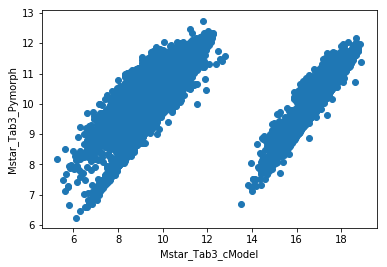

In [23]:
flags = (np.where(allmendel['FlagSerExp'] == 0))[0]
mendel = allmendel[flags]
keep = np.where((mendel['Mstar_Tab3_Pymorph'] > 0) * (mendel['Mstar_Tab3_cModel'] > 0))[0]
mendel2 = mendel[keep]
plt.scatter(mendel2['Mstar_Tab3_cModel'], mendel2['Mstar_Tab3_Pymorph'])
plt.xlabel('Mstar_Tab3_cModel')
plt.ylabel('Mstar_Tab3_Pymorph')

blah = medxbin(mendel2['Mstar_Tab3_cModel']-mendel2['Mstar_Tab3_Pymorph'], mendel2['Mstar_Tab3_Pymorph'],5)
print(blah)

(array([ 7.89]), array([( 10.766,  0.60913022,  0.703)], 
      dtype=[('median', '<f8'), ('sigma', '<f8'), ('iqr', '<f8')]))


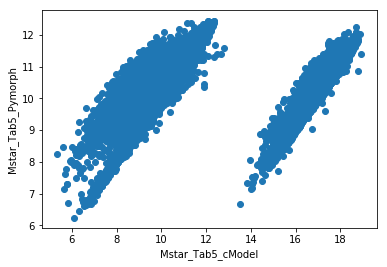

In [24]:
flags = (np.where(allmendel['FlagSerExp'] == 0))[0]
mendel = allmendel[flags]
keep = np.where((mendel['Mstar_Tab5_Pymorph'] > 0) * (mendel['Mstar_Tab5_cModel'] > 0))[0]
mendel2 = mendel[keep]
plt.scatter(mendel2['Mstar_Tab5_cModel'], mendel2['Mstar_Tab5_Pymorph'])
plt.xlabel('Mstar_Tab5_cModel')
plt.ylabel('Mstar_Tab5_Pymorph')

blah = medxbin(mendel2['Mstar_Tab5_cModel']-mendel2['Mstar_Tab5_Pymorph'], mendel2['Mstar_Tab5_Pymorph'],5)
print(blah)

(array([ 7.906]), array([( 10.728,  0.63015362,  0.743)], 
      dtype=[('median', '<f8'), ('sigma', '<f8'), ('iqr', '<f8')]))


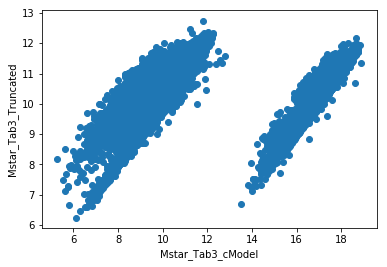

In [25]:
flags = (np.where(allmendel['FlagSerExp'] == 0))[0]
mendel = allmendel[flags]
keep = np.where((mendel['Mstar_Tab3_Truncated'] > 0) * (mendel['Mstar_Tab3_cModel'] > 0))[0]
mendel2 = mendel[keep]
plt.scatter(mendel2['Mstar_Tab3_cModel'], mendel2['Mstar_Tab3_Truncated'])
plt.xlabel('Mstar_Tab3_cModel')
plt.ylabel('Mstar_Tab3_Truncated')

blah = medxbin(mendel2['Mstar_Tab3_cModel']-mendel2['Mstar_Tab3_Truncated'], mendel2['Mstar_Tab3_Truncated'],5)
print(blah)

(array([ 7.906]), array([( 10.755,  0.60272683,  0.695)], 
      dtype=[('median', '<f8'), ('sigma', '<f8'), ('iqr', '<f8')]))


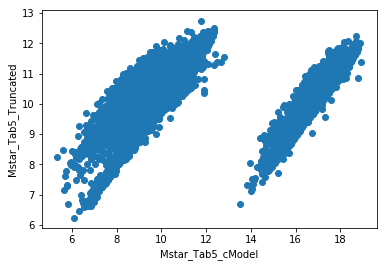

In [26]:
flags = (np.where(allmendel['FlagSerExp'] == 0))[0]
mendel = allmendel[flags]
keep = np.where((mendel['Mstar_Tab5_Truncated'] > 0) * (mendel['Mstar_Tab5_cModel'] > 0))[0]
mendel2 = mendel[keep]
plt.scatter(mendel2['Mstar_Tab5_cModel'], mendel2['Mstar_Tab5_Truncated'])
plt.xlabel('Mstar_Tab5_cModel')
plt.ylabel('Mstar_Tab5_Truncated')

blah = medxbin(mendel2['Mstar_Tab5_cModel']-mendel2['Mstar_Tab5_Truncated'], mendel2['Mstar_Tab5_Truncated'],5)
print(blah)